# Brand Classification

Source    : https://www.dqlab.id/

Typed by  : Aulia Khalqillah

## Import Libraries

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [2]:
dataset = pd.read_csv('retail_raw_reduced.csv')
dataset

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000
...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000


## Info data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     5000 non-null   int64 
 1   order_date   5000 non-null   object
 2   customer_id  5000 non-null   int64 
 3   city         5000 non-null   object
 4   province     5000 non-null   object
 5   product_id   5000 non-null   object
 6   brand        5000 non-null   object
 7   quantity     5000 non-null   int64 
 8   item_price   5000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 351.7+ KB


## Exploratory Data Analysis

Generate new columns of order_month and Gross Marchendise Volume (GMV)

In [4]:
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10
...,...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000,2019-12
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000,2019-07
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000,2019-10
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000,2019-10


In [5]:
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000
...,...,...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000,2019-12,900000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000,2019-07,4395000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000,2019-10,2988000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000,2019-10,5560000


Select top 5 brands based on its total of quantity in December 2019

In [8]:
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .reset_index()
                .drop('index',axis=1)
                .head(5))
top_brands

,brand,quantity
0,BRAND_S,2197
1,BRAND_P,2194
2,BRAND_R,1508
3,BRAND_C,1365
4,BRAND_A,1315


Generate new dataframe for top 5 brands in December 2019

In [14]:
dataset_top5brand_dec = dataset[
    (dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))
    ].reset_index().drop('index',axis=1)
dataset_top5brand_dec

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000,2019-12,14400000
1,1734790,2019-12-18,17422,Jakarta Selatan,DKI Jakarta,P0122,BRAND_A,12,695000,2019-12,8340000
2,1731961,2019-12-13,13880,Bogor,Jawa Barat,P2853,BRAND_R,6,740000,2019-12,4440000
3,1741561,2019-12-29,13521,Bandung,Jawa Barat,P3344,BRAND_S,2,520000,2019-12,1040000
4,1735633,2019-12-19,17096,Jakarta Selatan,DKI Jakarta,P3285,BRAND_S,4,1325000,2019-12,5300000
...,...,...,...,...,...,...,...,...,...,...,...
929,1728964,2019-12-09,14953,Tangerang,Banten,P2582,BRAND_P,1,1185000,2019-12,1185000
930,1735879,2019-12-19,12709,Denpasar,Bali,P3408,BRAND_S,24,240000,2019-12,5760000
931,1736503,2019-12-20,18109,Tangerang,Banten,P2866,BRAND_R,3,1045000,2019-12,3135000
932,1734787,2019-12-18,18283,Jakarta Selatan,DKI Jakarta,P0734,BRAND_C,2,310000,2019-12,620000


High value

In [44]:
max_brand = dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().idxmax().index
max_order_date = dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().idxmax().values
max_quantity = dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().max().values
max_quantity_value = ({
    'brand' : max_brand,
    'order_date': max_order_date,
    'max_quantity': max_quantity
})
max_quantity_datset = pd.DataFrame(max_quantity_value)
idx_max_qty = max_quantity_datset['max_quantity'].argmax()
max_quantity_datset

,brand,order_date,max_quantity
0,BRAND_A,2019-12-20,173
1,BRAND_C,2019-12-05,150
2,BRAND_P,2019-12-09,312
3,BRAND_R,2019-12-18,246
4,BRAND_S,2019-12-10,254


In [45]:
max_quantity_datset.iloc[idx_max_qty]

brand              BRAND_P
order_date      2019-12-09
max_quantity           312
Name: 2, dtype: object

A total of quantity of brands in December 2019

In [46]:
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack()

brand,BRAND_A,BRAND_C,BRAND_P,BRAND_R,BRAND_S
order_date,,,,,
2019-12-01,155,39,109,38,231
2019-12-02,12,105,153,45,47
2019-12-03,24,3,7,42,9
2019-12-04,40,38,54,35,28
2019-12-05,64,150,78,87,227
2019-12-06,90,29,62,25,104
2019-12-08,72,18,140,152,63
2019-12-09,26,66,312,26,57
2019-12-10,126,38,9,18,254


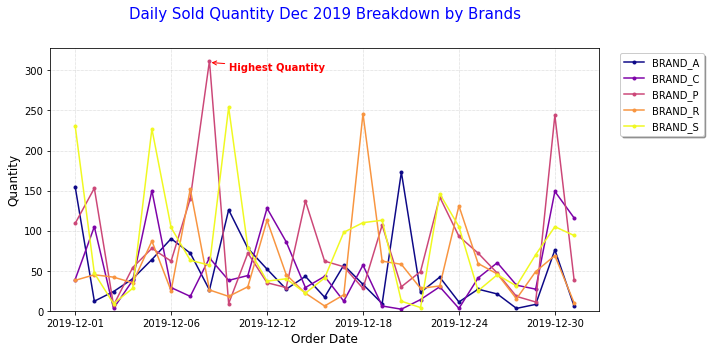

In [47]:
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma', figsize=(10,5))
plt.title('Daily Sold Quantity Dec 2019 Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='best', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
plt.annotate('Highest Quantity', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.tight_layout()
plt.show()

Plot number of sold products for each brand in December 2019

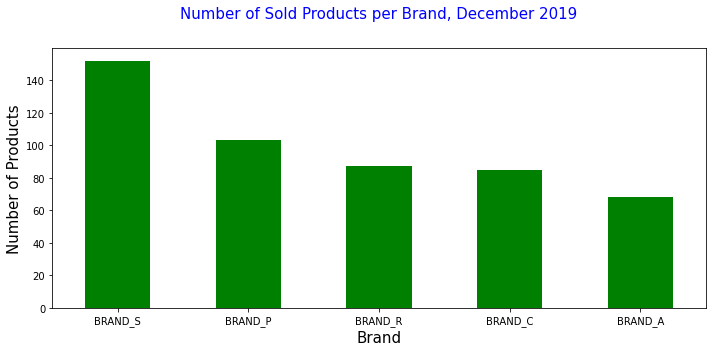

In [48]:
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green', figsize=(10,5))
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Generate new data frame of total of quantity for each product

In [49]:
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()
dataset_top5brand_dec_per_product

,brand,product_id,quantity
0,BRAND_A,P0002,1
1,BRAND_A,P0003,32
2,BRAND_A,P0029,12
3,BRAND_A,P0030,30
4,BRAND_A,P0033,1
...,...,...,...
490,BRAND_S,P3653,2
491,BRAND_S,P3655,12
492,BRAND_S,P3659,3
493,BRAND_S,P3665,6


Add a columns for quantity group (>=100 or < 100)

In [51]:
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(
    lambda x: '>= 100' if x>=100 else '< 100'
    )
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)
dataset_top5brand_dec_per_product

,brand,product_id,quantity,quantity_group
58,BRAND_A,P0255,258,>= 100
465,BRAND_S,P3534,234,>= 100
238,BRAND_P,P2770,216,>= 100
245,BRAND_P,P2790,185,>= 100
186,BRAND_P,P2489,170,>= 100
...,...,...,...,...
147,BRAND_C,P0927,1,< 100
149,BRAND_C,P0937,1,< 100
161,BRAND_P,P2417,1,< 100
163,BRAND_P,P2421,1,< 100


How much products in each brand?

In [53]:
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)
s_sort

brand
BRAND_S    152
BRAND_P    103
BRAND_R     87
BRAND_C     85
BRAND_A     68
Name: product_id, dtype: int64

In [54]:
dataset_top5brand_dec_per_product_by_quantity = dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack()
dataset_top5brand_dec_per_product_by_quantity

quantity_group,< 100,>= 100
brand,,
BRAND_S,149.0,3.0
BRAND_P,97.0,6.0
BRAND_R,83.0,4.0
BRAND_C,85.0,NaN
BRAND_A,66.0,2.0


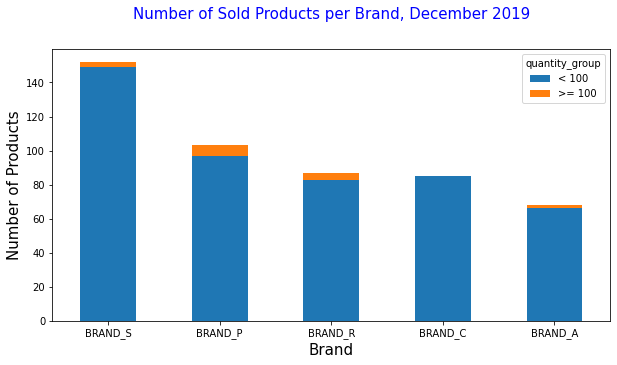

In [55]:
dataset_top5brand_dec_per_product_by_quantity.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

6 products of Brand P were sold more than 100 pcs, which is the highest sales number compared others products and brands. Otherwise, the Brand C was sold less than 100 pcs.

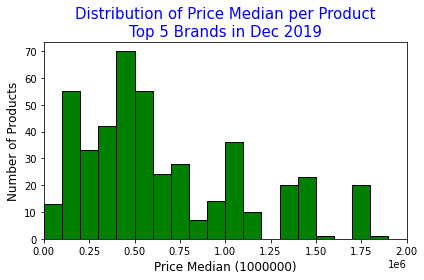

In [38]:
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=20, stacked=True, range=(1,2000000), color='green', edgecolor='black')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019', fontsize=15, color='blue')
plt.xlabel('Price Median (1000000)', fontsize = 12)
plt.ylabel('Number of Products', fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.tight_layout()
plt.show()

Based on median calculation, a lot of selling products has range of price from 250000 - 750000. That means, many products from various brands are purchased less than 1000000.

Calculate total of quantity, total of GMV, and median of item price for each product.

In [56]:
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
data_per_product_top5brand_dec

,product_id,quantity,gmv,item_price
0,P0002,1,904000,904000
1,P0003,32,14400000,450000
2,P0011,2,11890000,5945000
3,P0029,12,3720000,310000
4,P0030,30,7200000,240000
...,...,...,...,...
490,P3653,2,298000,149000
491,P3655,12,1908000,159000
492,P3659,3,4395000,1465000
493,P3665,6,14250000,2375000


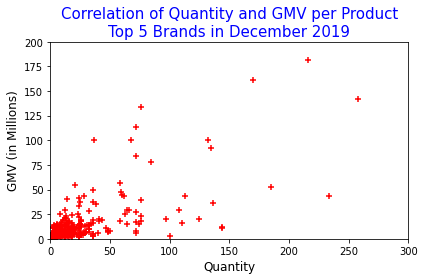

In [57]:
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.tight_layout()
plt.show()

The correlation between quantity number of product was purchased and GMV from top 5 brands in December 2019, a lot of products were sold less than 50 pcs. It indicates the GMV is not high enough for each brand. However, there are some quantities of products were sold more than 50 pcs.

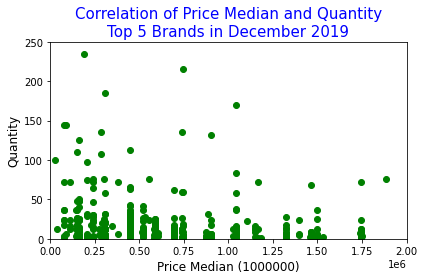

In [43]:
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Price Median and Quantity\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median (1000000)', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.tight_layout()
plt.show()

The correlation between median price and its quantity is various. The products were sold less than 50 pcs that have various price in range 250000 to 1750000. Also, there are more than 100 pcs of products were sold less than 1000000 of price. Overall, many products were purchased with high number of quantity have low price.